In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [60]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [61]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [62]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [63]:
def calc_norm_fit(X):
    res = (X - X.min()) / (X.max() - X.min())
    return res

In [64]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#        if i % (iterations / 10) == 0:
#            print(i, W, err)
    return W

In [65]:
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

### Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [66]:
first_list = [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 10]
second_list = []

In [67]:
for z in first_list:
    W = eval_model_reg2(X_st, y, iterations=2000, alpha=1e-2, lambda_=z)
    second_list.append(np.linalg.norm(W))

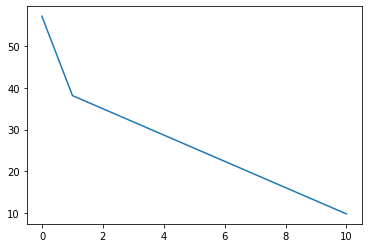

In [68]:
plt.plot(first_list, second_list)
plt.show()

### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [69]:
xx = X[3].copy().astype(np.float64)

In [70]:
xx

array([1., 1., 2., 1., 2., 1., 3., 3., 1., 2.])

In [71]:
norm = calc_norm_fit(xx)
print(f'Нормализация\nБыло: {xx}\nСтало: {norm}')


Нормализация
Было: [1. 1. 2. 1. 2. 1. 3. 3. 1. 2.]
Стало: [0.  0.  0.5 0.  0.5 0.  1.  1.  0.  0.5]


In [72]:
stand = calc_std_fit(xx)
print(f'Стандартизация\nБыло: {xx}\nСтало: {stand}')

Стандартизация
Было: [1. 1. 2. 1. 2. 1. 3. 3. 1. 2.]
Стало: [-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


In [73]:
norm_stand = calc_std_fit(norm)
stand_norm = calc_norm_fit(stand)

In [74]:
print(f'Стандартизация после нормализации:\n{norm_stand}')

Стандартизация после нормализации:
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


In [75]:
print(f'Нормализация после стандартизации:\n{stand_norm}')

Нормализация после стандартизации:
[0.  0.  0.5 0.  0.5 0.  1.  1.  0.  0.5]


In [76]:
print(norm == stand_norm, stand == norm_stand, sep='\n')

[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]


Ответ: одновременно стандартизацию и нормализацию к одному признаку конечно можно применять, но смысла в этом никакого нет, что показано в примерах выше.

### Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации

In [77]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(0, iterations):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X @ (y_pred - y) # градиент ф-ции ошибки
        dReg = lambda_/2 * np.abs(W) # градиент регуляции
        W -= alpha * (dQ + dReg) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [78]:
W2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [79]:
W1 = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

0 [1.61677962 0.04795293 0.81856369 1.6994097 ] 3257.191050140549
500 [56.49633664  5.90096109  1.03725555  5.52915239] 25.235981891864256
1000 [56.49858744  6.19555189  0.13401005  6.17226644] 24.946801429787
1500 [56.49858754  6.26607478 -0.17989364  6.42611562] 24.910119759380276
2000 [56.49858754  6.28964674 -0.292314    6.51863252] 24.905346398553085
2500 [56.49858754  6.29803895 -0.33275128  6.55199305] 24.904719666967104
3000 [56.49858754  6.30105504 -0.34730543  6.56400437] 24.90463548803329
3500 [56.49858754  6.30214045 -0.35254421  6.56832806] 24.904623510420528
4000 [56.49858754  6.30253114 -0.35442993  6.56988441] 24.904621573098066
4500 [56.49858754  6.30267177 -0.35510871  6.57044463] 24.90462118335409


In [80]:
W2

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [81]:
W1

array([56.49858754,  6.30272233, -0.35535276,  6.57064605])